# Simple Neural Network for Beginners

This notebook explains the basic concepts of neural networks in the simplest way possible.
We'll focus on understanding how data flows from input → hidden → output layers.

In [1]:
# Import only what we need
import numpy as np
import matplotlib.pyplot as plt

print("Ready to learn neural networks!")

Ready to learn neural networks!


## Step 1: The Sigmoid Activation Function

Before building our network, let's understand the sigmoid function.
It's like a "decision maker" that converts any number into a value between 0 and 1.

Input → Sigmoid Output
-5 → 0.007
-2 → 0.119
 0 → 0.500
 2 → 0.881
 5 → 0.993
[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04 1.24647146e-04 1.52547986e-04 1.86692945e-04
 2.28478855e-04 2.79614739e-04 3.42191434e-04 4.18766684e-04
 5.12469082e-04 6.27124987e-04 7.67413430e-04 9.39055039e-04
 1.14904229e-03 1.40591988e-03 1.72012560e-03 2.10440443e-03
 2.57431039e-03 3.14881358e-03 3.85103236e-03 4.70911357e-03
 5.75728612e-03 7.03711536e-03 8.59898661e-03 1.05038445e-02
 1.28252101e-02 1.56514861e-02 1.90885420e-02 2.32625358e-02
 2.83228820e-02 3.44451957e-02 4.18339400e-02 5.07243606e-02
 6.13831074e-02 7.41067363e-02 8.92170603e-02 1.07052146e-01
 1.27951705e-01 1.52235823e-01 1.80176593e-01 2.11963334e-01
 2.47663801e-01 2.87185901e-01 3.30246430e-01 3.76354517e-01
 4.24816868e-01 4.74768924e-01 5.25231076e-01 5.75183132e-01
 6.23645483e-01 6.69753570e-01 7.12814099e-01 7.52336199e-01
 7.88036666e-01 8.19823407e-01 8.47764177e-01 8.72048295e-01
 8.9294

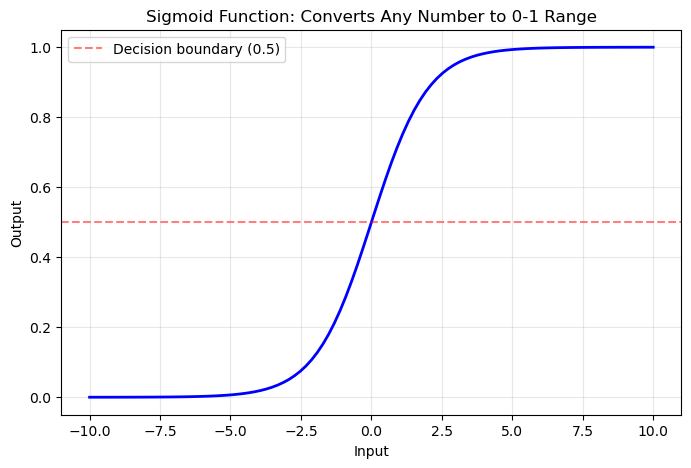

In [3]:
def sigmoid(x):
    """The sigmoid activation function - converts any number to 0-1 range"""
    return 1 / (1 + np.exp(-x))

# Let's see how sigmoid works
test_values = [-5, -2, 0, 2, 5]
print("Input → Sigmoid Output")
for val in test_values:
    result = sigmoid(val)
    print(f"{val:2d} → {result:.3f}")

# Visualize the sigmoid function
# Create an array of 100 evenly spaced values from -10 to 10 for plotting
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
print(y)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Sigmoid Function: Converts Any Number to 0-1 Range')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Decision boundary (0.5)')
plt.legend()
plt.show()

## Step 2: Simple Neural Network Architecture

Our network will have:
- **Input Layer**: 2 neurons (for 2 input values)
- **Hidden Layer**: 2 neurons (with sigmoid activation)
- **Output Layer**: 1 neuron (with sigmoid activation)

```
Input Layer    Hidden Layer    Output Layer
    [x1] ────────→ [h1] ────────→ [output]
         ╲      ╱      ╲      ╱
          ╲    ╱        ╲    ╱
           ╲  ╱          ╲  ╱
            ╱╲            ╱╲
           ╱  ╲          ╱  ╲
          ╱    ╲        ╱    ╲
         ╱      ╲      ╱      ╲
    [x2] ────────→ [h2] ────────→
```

In [4]:
# Step 2: Create our simple neural network
class SimpleNeuralNetwork:
    def __init__(self):
        """Initialize our simple 2→2→1 neural network"""
        print("🧠 Creating a simple neural network...")
        print("Architecture: 2 inputs → 2 hidden → 1 output")
        
        # Weights from input layer to hidden layer (2x2 matrix)
        self.weights_input_to_hidden = np.array([[0.5, 0.3],   # From input1 to [hidden1, hidden2]
                                                [0.2, 0.8]])   # From input2 to [hidden1, hidden2]
        
        # Weights from hidden layer to output layer (2x1 matrix)
        self.weights_hidden_to_output = np.array([[0.6],       # From hidden1 to output
                                                 [0.4]])       # From hidden2 to output
        
        print("✅ Network created with simple weights!")
        print(f"Input→Hidden weights:\n{self.weights_input_to_hidden}")
        print(f"Hidden→Output weights:\n{self.weights_hidden_to_output}")

# Create our network
network = SimpleNeuralNetwork()

🧠 Creating a simple neural network...
Architecture: 2 inputs → 2 hidden → 1 output
✅ Network created with simple weights!
Input→Hidden weights:
[[0.5 0.3]
 [0.2 0.8]]
Hidden→Output weights:
[[0.6]
 [0.4]]


## Step 3: Forward Pass - How Data Flows Through the Network

This is the most important concept! Let's see how input data travels through each layer.

In [5]:
def forward_pass_step_by_step(inputs):
    """Show exactly how data flows through each layer"""
    print("🔄 FORWARD PASS - Step by Step")
    print("=" * 50)
    
    # STEP 1: Input Layer
    print(f"📥 INPUT LAYER:")
    print(f"   Input values: {inputs}")
    print(f"   (These are just passed through - no processing)")
    
    # STEP 2: Input to Hidden Layer
    print(f"\n🔗 INPUT → HIDDEN LAYER:")
    print(f"   Multiply inputs by weights and sum:")
    
    # Calculate what goes into each hidden neuron
    hidden_input = np.dot(inputs, network.weights_input_to_hidden)
    print(f"   Hidden neuron 1 gets: {inputs[0]:.1f}×{network.weights_input_to_hidden[0,0]} + {inputs[1]:.1f}×{network.weights_input_to_hidden[1,0]} = {hidden_input[0]:.3f}")
    print(f"   Hidden neuron 2 gets: {inputs[0]:.1f}×{network.weights_input_to_hidden[0,1]} + {inputs[1]:.1f}×{network.weights_input_to_hidden[1,1]} = {hidden_input[1]:.3f}")
    
    # Apply sigmoid activation
    hidden_output = sigmoid(hidden_input)
    print(f"\n🎯 HIDDEN LAYER ACTIVATION:")
    print(f"   Apply sigmoid to convert to 0-1 range:")
    print(f"   Hidden neuron 1 output: sigmoid({hidden_input[0]:.3f}) = {hidden_output[0]:.3f}")
    print(f"   Hidden neuron 2 output: sigmoid({hidden_input[1]:.3f}) = {hidden_output[1]:.3f}")
    
    # STEP 3: Hidden to Output Layer
    print(f"\n🔗 HIDDEN → OUTPUT LAYER:")
    print(f"   The hidden layer outputs become inputs to the output layer:")
    
    # Calculate what goes into the output neuron
    output_input = np.dot(hidden_output, network.weights_hidden_to_output)
    print(f"   Output neuron gets: {hidden_output[0]:.3f}×{network.weights_hidden_to_output[0,0]} + {hidden_output[1]:.3f}×{network.weights_hidden_to_output[1,0]} = {output_input[0]:.3f}")
    
    # Apply final sigmoid activation
    final_output = sigmoid(output_input)
    print(f"\n🎯 OUTPUT LAYER ACTIVATION:")
    print(f"   Apply sigmoid: sigmoid({output_input[0]:.3f}) = {final_output[0]:.3f}")
    
    print(f"\n🏁 FINAL RESULT: {final_output[0]:.3f}")
    print("=" * 50)
    
    return hidden_output, final_output

# Test with sample input
test_input = np.array([1.0, 0.5])
hidden_result, output_result = forward_pass_step_by_step(test_input)

🔄 FORWARD PASS - Step by Step
📥 INPUT LAYER:
   Input values: [1.  0.5]
   (These are just passed through - no processing)

🔗 INPUT → HIDDEN LAYER:
   Multiply inputs by weights and sum:
   Hidden neuron 1 gets: 1.0×0.5 + 0.5×0.2 = 0.600
   Hidden neuron 2 gets: 1.0×0.3 + 0.5×0.8 = 0.700

🎯 HIDDEN LAYER ACTIVATION:
   Apply sigmoid to convert to 0-1 range:
   Hidden neuron 1 output: sigmoid(0.600) = 0.646
   Hidden neuron 2 output: sigmoid(0.700) = 0.668

🔗 HIDDEN → OUTPUT LAYER:
   The hidden layer outputs become inputs to the output layer:
   Output neuron gets: 0.646×0.6 + 0.668×0.4 = 0.655

🎯 OUTPUT LAYER ACTIVATION:
   Apply sigmoid: sigmoid(0.655) = 0.658

🏁 FINAL RESULT: 0.658


## Step 4: Key Concept - Layer Outputs Become Next Layer Inputs

This is the most important concept to understand!

In [6]:
def demonstrate_layer_flow():
    """Show how outputs of one layer become inputs of the next"""
    print("🔄 UNDERSTANDING LAYER FLOW")
    print("=" * 60)
    
    # Different test inputs
    test_cases = [
        [1.0, 0.0],
        [0.0, 1.0],
        [0.5, 0.5],
        [1.0, 1.0]
    ]
    
    for i, inputs in enumerate(test_cases):
        print(f"\n📋 Test Case {i+1}: Input = {inputs}")
        print("-" * 40)
        
        # Calculate step by step
        inputs_array = np.array(inputs)
        
        # Input → Hidden
        hidden_raw = np.dot(inputs_array, network.weights_input_to_hidden)
        hidden_activated = sigmoid(hidden_raw)
        
        print(f"Input Layer Output:  {inputs}")
        print(f"                     ↓ (becomes input to hidden layer)")
        print(f"Hidden Layer Input:  {hidden_raw}")
        print(f"Hidden Layer Output: {hidden_activated} (after sigmoid)")
        print(f"                     ↓ (becomes input to output layer)")
        
        # Hidden → Output
        output_raw = np.dot(hidden_activated, network.weights_hidden_to_output)
        output_activated = sigmoid(output_raw)
        
        print(f"Output Layer Input:  {output_raw}")
        print(f"Output Layer Output: {output_activated} (after sigmoid)")
        print(f"\n🎯 Final Answer: {output_activated[0]:.4f}")

demonstrate_layer_flow()

🔄 UNDERSTANDING LAYER FLOW

📋 Test Case 1: Input = [1.0, 0.0]
----------------------------------------
Input Layer Output:  [1.0, 0.0]
                     ↓ (becomes input to hidden layer)
Hidden Layer Input:  [0.5 0.3]
Hidden Layer Output: [0.62245933 0.57444252] (after sigmoid)
                     ↓ (becomes input to output layer)
Output Layer Input:  [0.60325261]
Output Layer Output: [0.6464001] (after sigmoid)

🎯 Final Answer: 0.6464

📋 Test Case 2: Input = [0.0, 1.0]
----------------------------------------
Input Layer Output:  [0.0, 1.0]
                     ↓ (becomes input to hidden layer)
Hidden Layer Input:  [0.2 0.8]
Hidden Layer Output: [0.549834   0.68997448] (after sigmoid)
                     ↓ (becomes input to output layer)
Output Layer Input:  [0.60589019]
Output Layer Output: [0.64700273] (after sigmoid)

🎯 Final Answer: 0.6470

📋 Test Case 3: Input = [0.5, 0.5]
----------------------------------------
Input Layer Output:  [0.5, 0.5]
                     ↓ (become

## Step 5: Visual Understanding

Let's create a simple visualization to see how our network processes data.

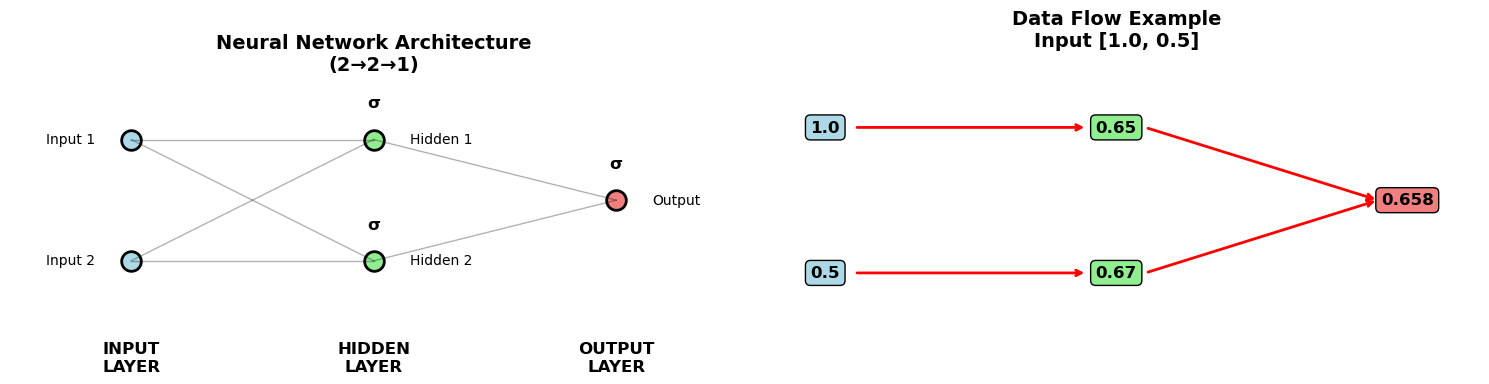

In [7]:
def visualize_network_flow():
    """Create a simple visualization of data flow"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: Network Architecture
    ax1.set_title('Neural Network Architecture\n(2→2→1)', fontsize=14, fontweight='bold')
    
    # Draw neurons as circles
    # Input layer
    ax1.scatter([0, 0], [2, 1], s=200, c='lightblue', edgecolors='black', linewidth=2)
    ax1.text(-0.3, 2, 'Input 1', ha='right', va='center', fontsize=10)
    ax1.text(-0.3, 1, 'Input 2', ha='right', va='center', fontsize=10)
    
    # Hidden layer
    ax1.scatter([2, 2], [2, 1], s=200, c='lightgreen', edgecolors='black', linewidth=2)
    ax1.text(2, 2.3, 'σ', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(2, 1.3, 'σ', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(2.3, 2, 'Hidden 1', ha='left', va='center', fontsize=10)
    ax1.text(2.3, 1, 'Hidden 2', ha='left', va='center', fontsize=10)
    
    # Output layer
    ax1.scatter([4], [1.5], s=200, c='lightcoral', edgecolors='black', linewidth=2)
    ax1.text(4, 1.8, 'σ', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(4.3, 1.5, 'Output', ha='left', va='center', fontsize=10)
    
    # Draw connections
    connections = [
        ((0, 2), (2, 2)), ((0, 2), (2, 1)),  # Input 1 to hidden
        ((0, 1), (2, 2)), ((0, 1), (2, 1)),  # Input 2 to hidden
        ((2, 2), (4, 1.5)), ((2, 1), (4, 1.5))  # Hidden to output
    ]
    
    for (x1, y1), (x2, y2) in connections:
        ax1.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, linewidth=1)
    
    ax1.set_xlim(-1, 5)
    ax1.set_ylim(0.5, 2.5)
    ax1.set_aspect('equal')
    ax1.axis('off')
    
    # Add layer labels
    ax1.text(0, 0.2, 'INPUT\nLAYER', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(2, 0.2, 'HIDDEN\nLAYER', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(4, 0.2, 'OUTPUT\nLAYER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Right plot: Data Flow Example
    ax2.set_title('Data Flow Example\nInput [1.0, 0.5]', fontsize=14, fontweight='bold')
    
    # Calculate actual values for visualization
    sample_input = np.array([1.0, 0.5])
    hidden_raw = np.dot(sample_input, network.weights_input_to_hidden)
    hidden_out = sigmoid(hidden_raw)
    output_raw = np.dot(hidden_out, network.weights_hidden_to_output)
    final_out = sigmoid(output_raw)
    
    # Show values at each layer
    ax2.text(0, 2, f'{sample_input[0]:.1f}', ha='center', va='center', fontsize=12, fontweight='bold', 
             bbox=dict(boxstyle='round', facecolor='lightblue'))
    ax2.text(0, 1, f'{sample_input[1]:.1f}', ha='center', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightblue'))
    
    ax2.text(2, 2, f'{hidden_out[0]:.2f}', ha='center', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightgreen'))
    ax2.text(2, 1, f'{hidden_out[1]:.2f}', ha='center', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightgreen'))
    
    ax2.text(4, 1.5, f'{final_out[0]:.3f}', ha='center', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightcoral'))
    
    # Draw arrows to show flow
    arrow_props = dict(arrowstyle='->', lw=2, color='red')
    ax2.annotate('', xy=(1.8, 2), xytext=(0.2, 2), arrowprops=arrow_props)
    ax2.annotate('', xy=(1.8, 1), xytext=(0.2, 1), arrowprops=arrow_props)
    ax2.annotate('', xy=(3.8, 1.5), xytext=(2.2, 2), arrowprops=arrow_props)
    ax2.annotate('', xy=(3.8, 1.5), xytext=(2.2, 1), arrowprops=arrow_props)
    
    ax2.set_xlim(-0.5, 4.5)
    ax2.set_ylim(0.5, 2.5)
    ax2.set_aspect('equal')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_network_flow()

## Summary: Key Concepts You've Learned

### 🎯 **Main Concepts:**

1. **Layers**: Neural networks have layers (Input → Hidden → Output)

2. **Data Flow**: Output of one layer becomes input of the next layer

3. **Weights**: Numbers that control how much influence each connection has

4. **Activation Function**: Sigmoid converts any number to 0-1 range

5. **Forward Pass**: Data flows from input to output through all layers

### 🔄 **The Process:**
```
Input → Multiply by weights → Add up → Apply sigmoid → Next layer
```

### 🧠 **Why This Works:**
- Each layer learns different patterns
- Sigmoid helps make decisions (0 = no, 1 = yes)
- Multiple layers can learn complex patterns

**Next Steps**: Once you understand this flow, we can learn how to train the network (adjust weights) to make better predictions!